In [43]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns


In [61]:
train_data = pd.read_csv('/Users/annikaseo-yeonkim/Desktop/MongooseAI/2주차/titanic/datasets/train.csv')
test_data = pd.read_csv('/Users/annikaseo-yeonkim/Desktop/MongooseAI/2주차/titanic/datasets/test.csv')
# train_data = pd.concat([train_data,test_data],axis = 0).reset_index(drop = False)
# # print(train_data['PassengerId'].count())
train_data.info()
print(train_data['Survived'].isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
0


In [45]:
median_age_by_pclass = train_data.groupby('Pclass')['Age'].median()
# print(median_age_by_pclass)

def fill_age(row):
    if pd.isnull(row['Age']):
        return median_age_by_pclass[row['Pclass']]
    else:
        return row['Age']
    
train_data['Age'] = train_data.apply(fill_age, axis=1)

In [46]:
train_data['Deck'] = train_data['Cabin'].str.slice(0,1)
deck_distribution = train_data['Deck'].value_counts(dropna = False)
clean_distribution = train_data['Deck'].value_counts(dropna = True)

print(train_data.groupby('Deck')['Fare'].median())
# correlation_coefficient3 = train_data['Deck'].corr(train_data['Pclass'])
# print(train_data.groupby('Survived')['Age'].median())

print(train_data.groupby('Deck')['Pclass'].value_counts()) #Cabin C had the most 1st class passengers 

train_data['title'] = train_data.Name.str.extract('\, ([A-Z][^ ]*\.)',expand=False) #title deck

#print(train_data['Fare'].min()) # there are zero values in the dataset
#print((train_data.Fare == 0).sum()) # 17 zero values 
train_data.Fare = train_data.Fare.replace(0,np.NaN) # replace 0 with NaN
# print((train_data.Fare == 0).sum())

#now fill in the Fare column
train_data['Fare_clean'] = train_data.Fare.dropna()
#print(train_data['Fare_clean'])
correlation_coefficient3 = train_data['Fare_clean'].corr(train_data['Pclass']) #correlation_coefficient3 = -0.5694
median_fare_by_pclass = train_data.groupby('Pclass')['Fare'].median()
print(median_fare_by_pclass)


Deck
A    35.50000
B    80.00000
C    83.47500
D    53.10000
E    45.18125
F    13.00000
G    13.58125
T    35.50000
Name: Fare, dtype: float64
Deck  Pclass
A     1         15
B     1         47
C     1         59
D     1         29
      2          4
E     1         25
      2          4
      3          3
F     2          8
      3          5
G     3          4
T     1          1
Name: count, dtype: int64
Pclass
1    61.9792
2    15.0229
3     8.0500
Name: Fare, dtype: float64


In [62]:
def fill_fare(row):
    if pd.isnull(row['Fare']):
        return median_fare_by_pclass[row['Pclass']]
    else:
        return row['Fare']
    
train_data['Fare'] = train_data.apply(fill_fare, axis=1)
# fare_distribution = train_data['Fare'].value_counts(dropna = False)



In [48]:
# deck column
# train_data = train_data.dropna(subset=['Deck', 'Pclass'])

# Group by Cabin and calculate the distribution of Pclass
# cabin_pclass_distribution = train_data.groupby('Pclass')['Deck'].value_counts(normalize=True).unstack()

# Plot the distribution
# plt.figure(figsize=(12, 6))
# sns.heatmap(cabin_pclass_distribution, annot = True)
# plt.title('Distribution of Deck for each Pclass')
# plt.xlabel('Deck')
# plt.ylabel('Pclass')
# plt.show()

In [49]:
train_data['Deck'] = train_data.groupby('Pclass')['Deck'].transform(lambda x: x.fillna(x.mode().loc[0])) # used chatgpt
# print(sum(train_data['Deck'].isnull())) --> validated the results (the 'Deck' column is now filled)

In [50]:
print(train_data['Survived'].isnull().sum()) # missing 418 values in the 'Survived' column

0


In [51]:
sex_encoded = pd.get_dummies(train_data['Sex'], prefix='sex')

# Concatenate the original DataFrame with the new one-hot encoded variable
df_encoded = pd.concat([train_data, sex_encoded], axis=1)


        Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363
Deck  Survived
A     0             8
      1             7
B     1            35
      0            12
C     1            54
      0            45
D     1            25
      0             8
E     1            24
      0             8
F     0           465
      1           195
G     0             2
      1             2
T     0             1
Name: count, dtype: int64


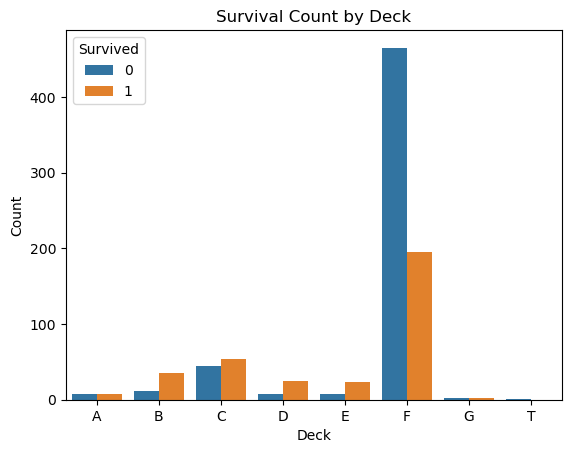

In [52]:
print(train_data[['Pclass','Survived']].groupby('Pclass').mean()) 
corr = train_data['Pclass'].corr(train_data['Survived']) # corr = -0.338
corr2 = train_data['Age'].corr(train_data['Survived']) # corr2 = -0.077 
corr3 = train_data['Fare'].corr(train_data['Survived']) # corr3 = 0.25
corr_sex_survived = df_encoded[['sex_male', 'sex_female']].corrwith(df_encoded['Survived']) #asked chatgpt and got sex_male = -0.54, sex_female = 0.54
print(train_data.groupby('Deck')['Survived'].value_counts())
# sns.barplot(train_data.groupby('Deck')['Survived']) 
# plt.show()

grouped_counts = train_data.groupby(['Deck', 'Survived']).size().reset_index(name='Count')

# Plot the grouped counts using seaborn #asked my good friend ChatGpt
sns.barplot(x='Deck', y='Count', hue='Survived', data=grouped_counts)
plt.title('Survival Count by Deck')
plt.xlabel('Deck')
plt.ylabel('Count')
plt.show()

In [53]:
# Deck F passengers mostly died, more females survived than males, 1st class passengers mostly survived --> will use these correlations to fill out the 'survived' column
sum =0
count_f = (train_data['Deck'] == "F").sum()

# Check if 'Deck' is "F" and 'Survived' is NaN
condition_met = (train_data['Deck'] == "F") & (train_data['Survived'].isna())

for index, row in train_data.iterrows():
    # Check if 'Deck' is "F" and 'Survived' is NaN for the current passenger 
    if row['Deck'] == "F" and pd.isna(row['Survived']) and row['Sex'] == "female":
        # If the condition is met, update 'Survived' to 1 for the current passenger
        train_data.at[index, 'Survived'] = 1

    if row['Sex'] == 'male' and row['Age'] < 40:
        train_data.at[index, 'Survived'] = 0 



In [54]:
for index, row in train_data.iterrows():
    # Check if 'Pclass' is 1 and 'Survived' is NaN for the current passenger 
    if pd.isna(row['Survived']) and row['Pclass'] == 1:
        # If the condition is met, update 'Survived' to 1 for the current passenger
        train_data.at[index, 'Survived'] = 1

# print(train_data['Survived'])
# print(train_data['Survived'].isnull().sum()) --> have three more cells to fill in

for index, row in train_data.iterrows():
    if pd.isna(row['Survived']):
        print(index,row)
        print()



In [63]:
import requests
import pandas as pd

# print(train_data['Survived'].isnull().sum()) - three passengers don't meet some but not all of the conditions listed above (shall deal with them on a case by case basis)
for index, row in train_data.iterrows():
    if "Sandstrom" in row['Name']: #Passenger Beatrice Irene Sandstrom -  mom and sister survived
        # print(row['Name'],row['PassengerId'])
        train_data.at[index, 'Survived'] = 1
    
        print(row['Name'],row['Survived'])
    
    if "Malachard" in row['Name']: #Noel Malachard: no siblings or spouse, 2nd class passenger, male, 29 y/o --> probably didn't survive
        # print(row['Name'],row['Survived'])
        train_data.at[index, 'Survived'] = 0

        print(row['Name'],row['Survived'])
    
    if "Nourney" in row['Name']: # Alfred Nourney: no siblings or spouse, 2nd class passenger, male, 20 y/o, cabin D  
        # print(row['Name'],row['Survived'])
        train_data.at[index, 'Survived'] = 0

        print(row['Name'],row['Survived'])
    

print(train_data['Survived'].isnull().sum())

# print(train_data['PassengerId'],train_data['Survived'])

survivors = pd.DataFrame({'PassengerId': train_data.PassengerId, 'Survived': train_data.Survived})
print(survivors)
print(train_data.Survived.isnull().sum())
survivors.to_csv('survivors_final.csv', index = False)

Sandstrom, Miss. Marguerite Rut 1
Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengtsson) 1
0
     PassengerId  Survived
0              1         0
1              2         1
2              3         1
3              4         1
4              5         0
..           ...       ...
886          887         0
887          888         1
888          889         0
889          890         1
890          891         0

[891 rows x 2 columns]
0
